In [1]:
import csv
from PIL import Image #pip install Pillow
import numpy as np
from matplotlib import pyplot
from os import path
import pandas as pd

#import requests
#import io
#import urllib3
#urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
NUM_IMAGES_TO_READ_IN=101

data = {"image_names":[],"images":np.empty((NUM_IMAGES_TO_READ_IN,50,50,3)),"features":np.empty((NUM_IMAGES_TO_READ_IN,50*50*3))}
counter = 0
with open('metadata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in tuple(rows)[1:]:
        filename = row[5]
        try:
            #url = "https://fs.a0-0.com/cs254a-final-project/data/medical-masks-part1/images_reduced/"+filename
            #image = np.array(Image.open(io.BytesIO(requests.get(url, stream=True, verify=False).content)))
            image = np.array(Image.open(path.join("data", filename)))
            data["images"][counter] = image
            data["features"][counter] = np.reshape(image, 50*50*3)
            data["image_names"].append(filename)
            counter += 1
            if(counter >= NUM_IMAGES_TO_READ_IN):
                break
        except FileNotFoundError:
            pass
        data["images"] = data["images"].astype(int)
        data["features"] = data["features"].astype(int)

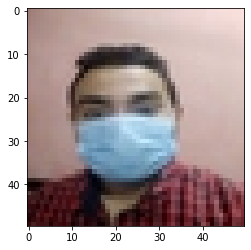

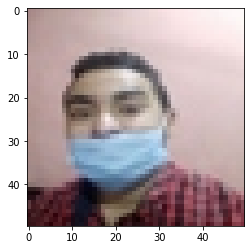

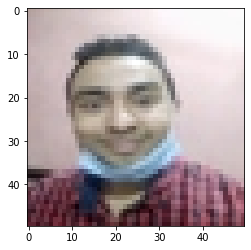

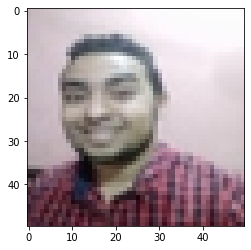

In [3]:
for img in data["images"][0:4]:
    pyplot.figure()
    pyplot.imshow(img)

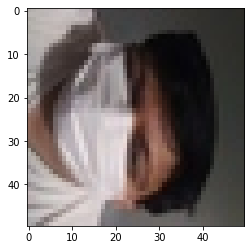

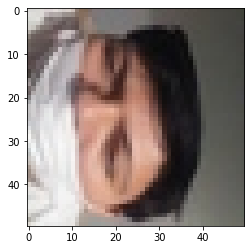

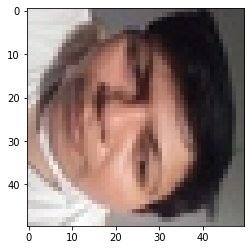

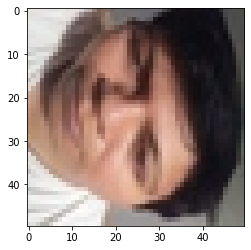

In [4]:
for img in data["images"][-5:-1]:
    pyplot.figure()
    pyplot.imshow(img)

In [5]:
print(data["images"].shape)
print(data["features"].shape)
pd.DataFrame(data["features"])

(101, 50, 50, 3)
(101, 7500)


,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,153,122,117,159,128,123,163,133,125,168,...,8,112,53,59,103,41,46,96,34,39
1,165,135,135,168,138,138,171,143,142,175,...,24,129,59,69,136,62,75,122,48,61
2,178,160,156,181,163,159,186,166,165,189,...,40,102,58,71,135,79,92,114,54,66
3,193,183,184,197,187,188,201,186,191,204,...,82,95,44,59,61,20,36,78,42,56
4,204,191,175,201,188,172,211,195,182,212,...,35,54,45,30,53,46,30,54,47,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,176,172,169,181,177,174,187,182,179,188,...,71,76,76,68,74,75,69,74,75,69
97,215,214,212,215,214,212,217,216,212,222,...,101,109,109,99,108,108,100,106,106,98
98,221,223,220,223,225,222,226,225,223,225,...,122,127,128,122,124,123,118,122,121,116
99,227,226,222,230,229,225,234,228,228,230,...,124,131,132,124,129,129,119,129,129,119
